In [21]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate

warnings.filterwarnings("ignore")
from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = 15, 6
from sklearn.preprocessing import MinMaxScaler
import math

from keras.models import Sequential

from keras.layers import Dense, BatchNormalization, Dropout, Activation

from keras.layers import LSTM, GRU
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

from keras.optimizers import Adam, SGD, RMSprop

In [22]:
prices = pd.read_csv('AAPL full.csv')


date = prices['Date']
date = pd.to_datetime(date)
cprices = prices['Close'][date.dt.year<=2020]
total = prices['Close']





In [23]:

stocks= np.array(cprices)

stocks = stocks.reshape(len(stocks) , 1)
trainlen = int(len(stocks)*0.80)

a_train_data = stocks[:trainlen]
a_test_data = stocks[trainlen:]

scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(a_train_data)
test_data = scaler.transform(a_test_data)



In [24]:
x_train_data = []
y_train_data = []

x_test_data=[]
y_test_data=[]

for i in range(len(train_data)-20):
    x_train_data.append(train_data[i:i+20,0])
    y_train_data.append(train_data[i+20,0])

for i in range(len(test_data)-20):
    x_test_data.append(test_data[i:i+20,0])
    y_test_data.append(test_data[i+20,0])




  




In [25]:
x_train_data = np.array(x_train_data)
x_test_data = np.array(x_test_data)
y_train_data = np.array(y_train_data)
y_test_data = np.array(y_test_data)

x_train_data = np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))
x_test_data = np.reshape(x_test_data, (x_test_data.shape[0],x_test_data.shape[1],1))
# print(x_train_data.shape)
# print(y_train_data.shape)
# print(x_test_data.shape)
# print(x_test_data)


In [26]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape = (x_train_data.shape[1],1)))
model.add(LSTM(100,return_sequences = False))
model.add(Dense(80))
model.add(Dense(1))

In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train_data, y_train_data, batch_size=1, epochs=1, validation_data = (x_test_data, y_test_data))



1993/1993 [==============================] - 15s 6ms/step - loss: 0.0016 - val_loss: 0.0632


In [28]:
predictions_a = model.predict(x_test_data)

predictions = scaler.inverse_transform(predictions_a)
predictions = np.reshape(predictions,(predictions.shape[0]))

y_test_data_a = np.reshape(y_test_data,(y_test_data.shape[0],1))
y_test_data = scaler.inverse_transform(y_test_data_a)


16/16 [==============================] - 1s 7ms/step


In [29]:
new_data = prices['Close'][date.dt.year >= 2021]
new_data = np.array(new_data)
new_data = np.reshape(new_data,(len(new_data),1))
new_input_t = scaler.transform(new_data)
new_input = []
for i in range(len(new_input_t)-20):
    new_input.append(new_input_t[i:i+20,0])

new_input = np.array(new_input)
new_input_t = np.reshape(new_input,(new_input.shape[0],new_input.shape[1],1))

new_pred = model.predict(new_input_t)

new_pred_inv = scaler.inverse_transform(new_pred)

    

16/16 [==============================] - 0s 5ms/step


(0.0, 200.0)

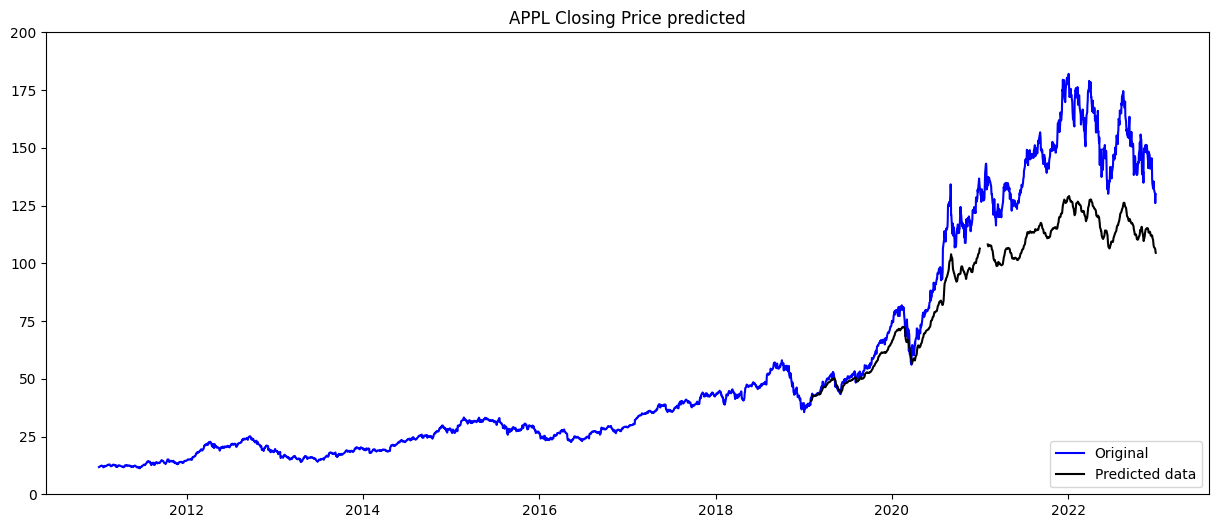

In [30]:
plt.figure()
plt.plot( date , total,color = 'blue')
plt.plot( date[len(date[date.dt.year <=2020])-len(predictions) : len(date[date.dt.year <=2020])] ,predictions,color='black')
plt.plot(date[len(date.dt.year)-len(new_pred_inv):len(date.dt.year)],new_pred_inv, color='black')
plt.legend(['Original','Predicted data'],loc='lower right')
plt.title('APPL Closing Price predicted')


plt.ylim(0,200)